# Pràctica 1 - El procés de l'aprenentatge automàtic:
## Imports

In [32]:
import os
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray
import numpy as np
from skimage.feature import hog
from skimage import exposure
from matplotlib import pyplot as plt

## Funció de processament de dades

In [36]:
def load_and_preprocess(folder_path, target_size=(64, 64), hog_orientations=9, hog_pixels_per_cell=(8, 8), hog_cells_per_block=(2, 2), train=True):
    images = []
    labels = []
    hog_features = []
    hog_images_rescaled = []
    
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = io.imread(image_path)
            
            # Preprocess the image (resize, convert to grayscale, etc.)
            image = resize(image, target_size)
            # Check if the image is already grayscale
            if image.ndim == 2:
                # Grayscale image
                gray_image = image
            else:
                # Convert color image to grayscale
                gray_image = rgb2gray(image)
            
            # Compute HOG features
            hog_feature, hog_image = hog(gray_image, orientations=hog_orientations,
                                         pixels_per_cell=hog_pixels_per_cell,
                                         cells_per_block=hog_cells_per_block,
                                         block_norm='L2-Hys', visualize=True)
            
            # Rescale histogram for better display
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

            # Append arrays
            hog_images_rescaled.append(hog_image_rescaled)
            hog_features.append(hog_feature.flatten())
            images.append(gray_image.flatten())
            labels.append(label)
    
    return np.array(images), np.array(labels), np.array(hog_features), np.array(hog_images_rescaled),

## Processament de dades

(1500, 4096) imatges train processades


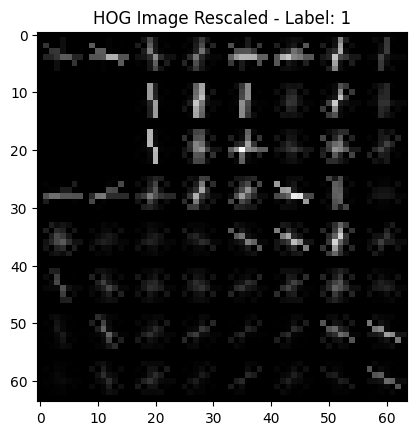

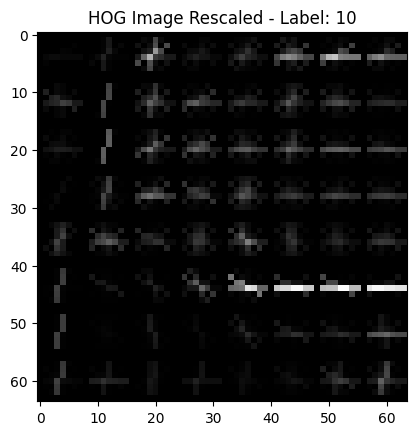

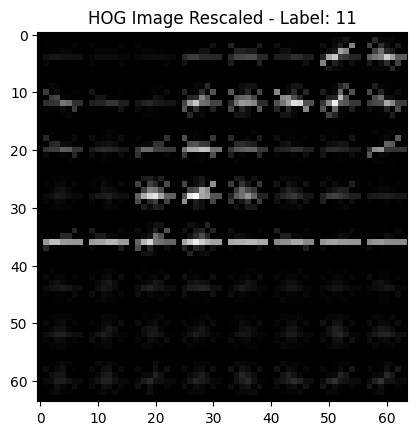

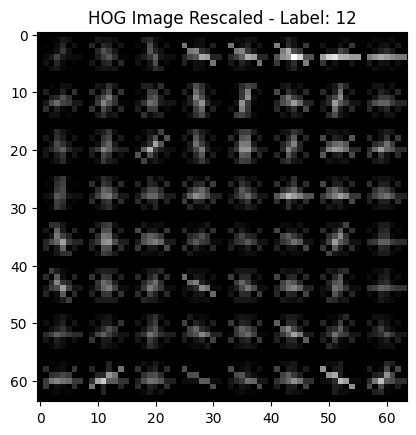

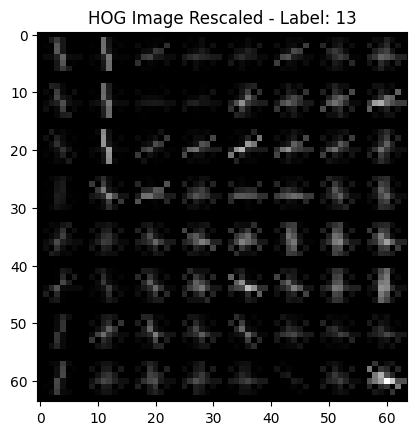

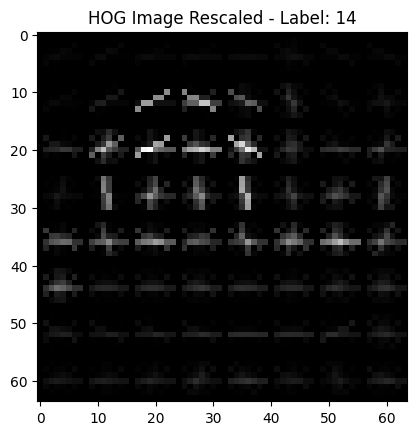

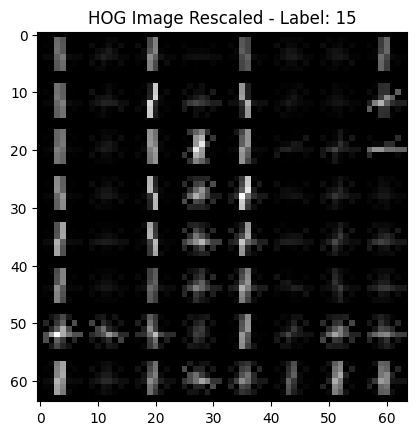

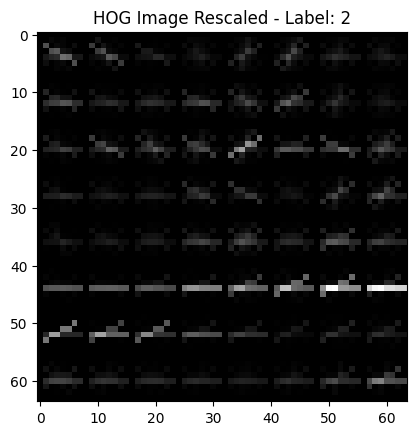

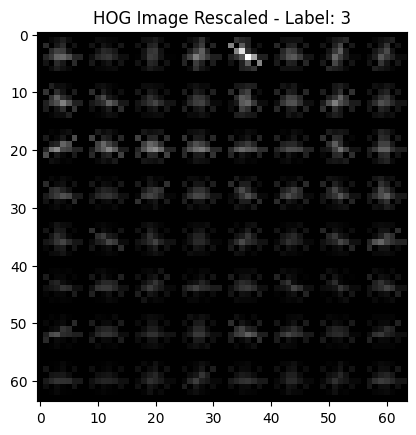

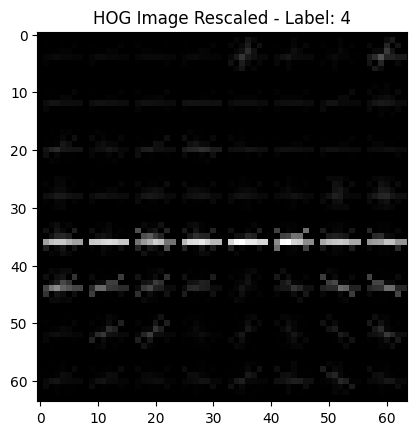

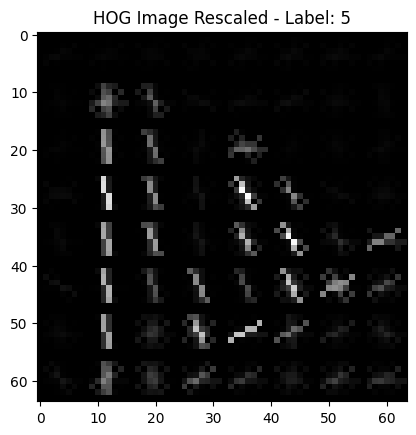

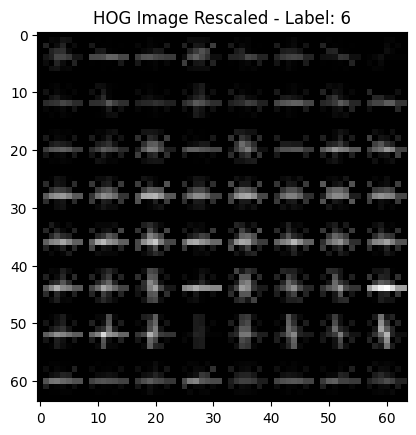

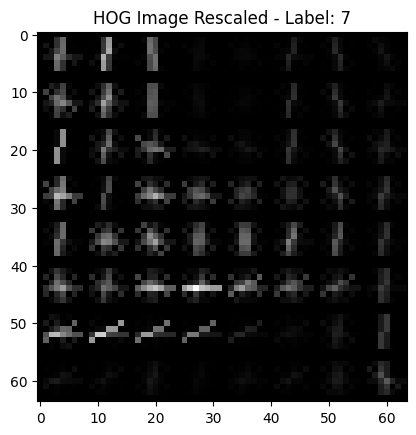

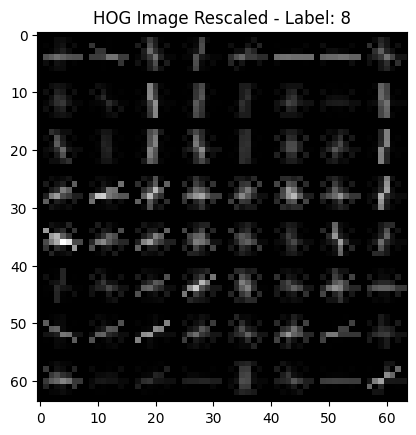

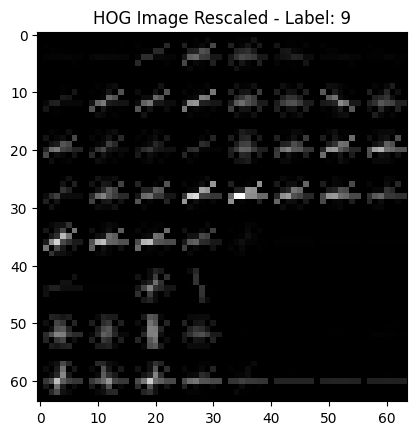

Processant imatges test
(2985, 4096) imatges test processades


In [37]:
train_path = 'dat/train/'
test_path = 'dat/test/'
X_train, y_train, hog_train, hog_train_images = load_and_preprocess(train_path)
print(f"{X_train.shape} imatges train processades")

# Mostrar hogs
unique_labels = np.unique(y_train)

for label in unique_labels:
    # Find the index of the first image with the current label
    index = np.where(y_train == label)[0][0]
    # Display the corresponding hog_image_rescaled
    plt.imshow(hog_train_images[index], cmap='gray')
    plt.title(f'HOG Image Rescaled - Label: {label}')
    plt.show()

print("Processant imatges test")
X_test, y_test, hog_test, hog_test_images = load_and_preprocess(test_path)
print(f"{X_test.shape} imatges test processades")

## Transformació de les dades

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Imatges escalades")

Imatges escalades


## Entrenament i test dels SVM

### Kernel Lineal

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
print("Model entrenat")
y_pred = svm.predict(X_test_scaled)

# Evaluate the Model
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cf_matrix)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

### Kernel RBF

In [38]:
escalat = False
hog = True
if(escalat):
    X_train = X_train_scaled
    X_test = X_test_scaled
if(hog):
    X_train = hog_train
    X_test = hog_test

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
print("Model entrenat")
y_pred = svm.predict(X_test)

# Evaluate the Model
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cf_matrix)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Model entrenat
Confusion matrix:
 [[ 53   7   1   2   0   0   2   0   0   0  10   0  13  27   1]
 [ 10  52   0   2   1   2   5   0   0   0  11  11  13   8   0]
 [  0   1 190   0   0   7   0  53   4   9   2   0   2   1  41]
 [  2   2   7 116   2   3  12   3  25   1   2  14   3   9  14]
 [  6   1   2   7 134   5   0   1   1   4  13   8   2   2   6]
 [  2   2   0   0   0 114   1   0   1   0   8   8   0   3   2]
 [  6  11   0  11   0   0 188   0   1   0  14   7   6  10   2]
 [  2   3  49   0   1   0   0 183   1  14   0   0   0   0   7]
 [  1   1   0  12   3   1   0   0 196   0   3   0   0   0  11]
 [  0   0   9   3   1   2   0  13   0 116   1   2   1   1  11]
 [  8  12   8  24   5   4  27   4   8   4  59  20   4  10  14]
 [  3  11   2  17   4  10  20   5   0   0  12 106  14   4   0]
 [ 12   8   0   7   1   2   7   3   0   1   2   4  45  18   0]
 [ 21   5   2  14   1   1   7   0   1   0   7   3  28  99   0]
 [  2   2  33   8   1   5   3   7   9   9   6   1   0   0 188]]
Accuracy:  0.6160804

### Kernel Polinomic

In [ ]:
svm = SVC(kernel='poly')
svm.fit(X_train_scaled, y_train)
print("Model entrenat")
y_pred = svm.predict(X_test_scaled)

# Evaluate the Model
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cf_matrix)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)